In [1]:
#BRIEF INFORMATION ON WHAT THIS PYTHON CODE IS DOING
#This code carries out Exploratory Data Analysis (EDA) of insurance company expenses on their clients 
#based on their behavior and health challenges. It analyzes, identifies patterns, 
#and explores the data. It then models, predicts, solves the problem, 
#and presents the visual, report, and problem-solving solution.
#Some of the library used include pandas, pandas_profiling, numpy, sklearn, seaborn
#matplotlib
#In summary, the following were carried out
#Read In and Explore the Data
#Data Analysis
#Data Visualization
#Cleaning Data
#Choosing the Best predictive Model

In [2]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as pl
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('/home/adebayo/Desktop/practice-python/eda-insurance/insurance.csv')

In [3]:
data.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [46]:
#Use pandas_profiling to get a quick summaryand insight into data and their 
#relationship that may exist in the variables
import pandas_profiling
data.profile_report()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
#Transforming string data into intergers

from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [6]:
data.region.head()

0    3
1    2
2    2
3    1
4    1
Name: region, dtype: int64

In [7]:
data.corr()['expenses'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198576
age         0.299008
smoker      0.787251
expenses    1.000000
Name: expenses, dtype: float64

In [8]:
data.head()

age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86

In [9]:
#Description analysis of the adat
data.describe().T

count          mean           std      min        25%      50%  \
age       1338.0     39.207025     14.049960    18.00    27.0000    39.00   
sex       1338.0      0.505232      0.500160     0.00     0.0000     1.00   
bmi       1338.0     30.665471      6.098382    16.00    26.3000    30.40   
children  1338.0      1.094918      1.205493     0.00     0.0000     1.00   
smoker    1338.0      0.204783      0.403694     0.00     0.0000     0.00   
region    1338.0      1.515695      1.104885     0.00     1.0000     2.00   
expenses  1338.0  13270.422414  12110.011240  1121.87  4740.2875  9382.03   

                75%       max  
age          51.000     64.00  
sex           1.000      1.00  
bmi          34.700     53.10  
children      2.000      5.00  
smoker        0.000      1.00  
region        2.000      3.00  
expenses  16639.915  63770.43

In [10]:
# check for missing values
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [11]:
data.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [12]:
data.head()

age  sex   bmi  children  smoker  region  expenses
0   19    0  27.9         0       1       3  16884.92
1   18    1  33.8         1       0       2   1725.55
2   28    1  33.0         3       0       2   4449.46
3   33    1  22.7         0       0       1  21984.47
4   32    1  28.9         0       0       1   3866.86

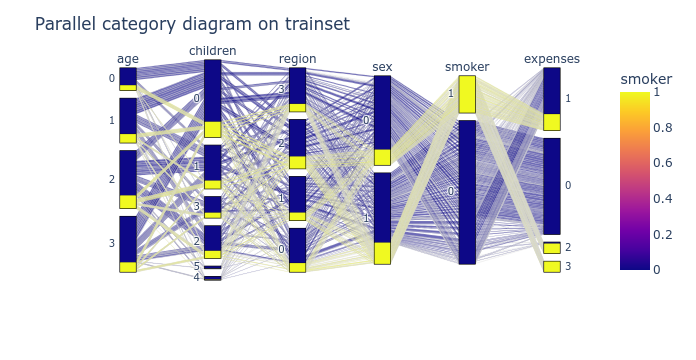

In [13]:
import plotly.express as px
dataset2 = data.copy()
# Mapping Age
dataset2.loc[ dataset2['age'] <= 20, 'age'] 					      = 0
dataset2.loc[(dataset2['age'] > 20) & (dataset2['age'] <= 32), 'age'] = 1
dataset2.loc[(dataset2['age'] > 32) & (dataset2['age'] <= 48), 'age'] = 2
dataset2.loc[(dataset2['age'] > 48) & (dataset2['age'] <= 64), 'age'] = 3
dataset2.loc[ dataset2['age'] > 64, 'age']                            = 4

# Mapping expenses
dataset2.loc[ dataset2['expenses'] <= 10000, 'expenses'] 						         = 0
dataset2.loc[(dataset2['expenses'] > 10000) & (dataset2['expenses'] <= 30000), 'expenses'] = 1
dataset2.loc[(dataset2['expenses'] > 30000) & (dataset2['expenses'] <= 40000), 'expenses'] = 2
dataset2.loc[ dataset2['expenses'] > 40000, 'expenses'] 							     = 3
dataset2['expenses'] = dataset2['expenses'].astype(int)

parallel_diagram = dataset2[['age', 'bmi', 'children',  'region', 'sex', 'smoker', 'expenses']]
#Map the color to the content of a culumn
dataset2['smoker'] = dataset2['smoker'].map({ '0': 2, '1': 3})
#You can plot px.parallel_categories or px.parallel_coordinates
fig = px.parallel_categories(parallel_diagram, color = 'smoker')
fig.update_layout(title='Parallel category diagram on trainset')
fig.show()

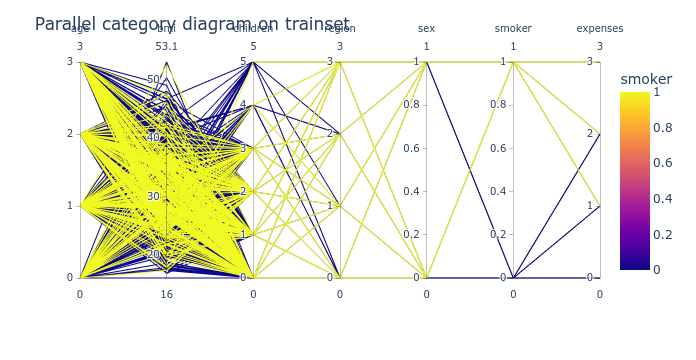

In [14]:
import plotly.express as px
dataset2 = data.copy()
# Mapping Age
dataset2.loc[ dataset2['age'] <= 20, 'age'] 					      = 0
dataset2.loc[(dataset2['age'] > 20) & (dataset2['age'] <= 32), 'age'] = 1
dataset2.loc[(dataset2['age'] > 32) & (dataset2['age'] <= 48), 'age'] = 2
dataset2.loc[(dataset2['age'] > 48) & (dataset2['age'] <= 64), 'age'] = 3
dataset2.loc[ dataset2['age'] > 64, 'age']                            = 4
# Mapping expenses
dataset2.loc[ dataset2['expenses'] <= 10000, 'expenses'] 						         = 0
dataset2.loc[(dataset2['expenses'] > 10000) & (dataset2['expenses'] <= 30000), 'expenses'] = 1
dataset2.loc[(dataset2['expenses'] > 30000) & (dataset2['expenses'] <= 40000), 'expenses'] = 2
dataset2.loc[ dataset2['expenses'] > 40000, 'expenses'] 							     = 3
dataset2['expenses'] = dataset2['expenses'].astype(int)

parallel_diagram = dataset2[['age', 'bmi', 'children',  'region', 'sex', 'smoker', 'expenses']]
#Map the color to the content of a culumn
dataset2['smoker'] = dataset2['smoker'].map({ '0': 2, '1': 3})
#You can plot px.parallel_categories or px.parallel_coordinates
fig = px.parallel_coordinates(parallel_diagram, color = 'smoker')
fig.update_layout(title='Parallel category diagram on trainset')
fig.show()

<AxesSubplot:>

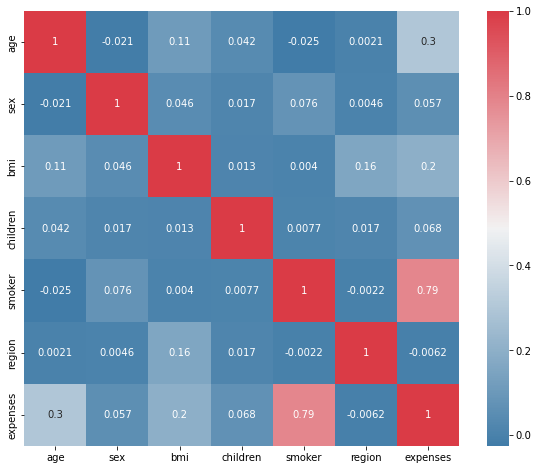

In [15]:
#If you put annot=True, you will have the correlation number inside

f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(240,10,as_cmap=True),
            square=True, ax=ax, annot=True)

In [16]:
print(f)

Figure(720x576)


Text(0.5, 1.0, 'Distribution of expenses')

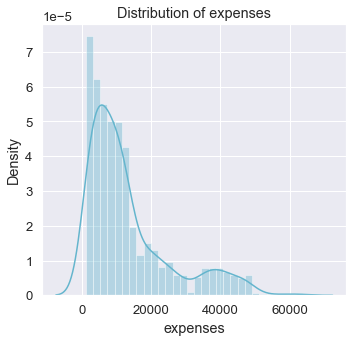

In [17]:
#First, let's look at the distribution of charges.
f= pl.figure(figsize=(12,5))

#to use ax=axs[0] and ax=ax[1] for the second plot
#f, axs = pl.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[10, 10]))

sns.set(font_scale=1.2)

ax=f.add_subplot(121)
sns.distplot(data["expenses"],color='c',ax=ax)
ax.set_title('Distribution of expenses')


Text(0.5, 1.0, 'Distribution of expenses for non-smokers')

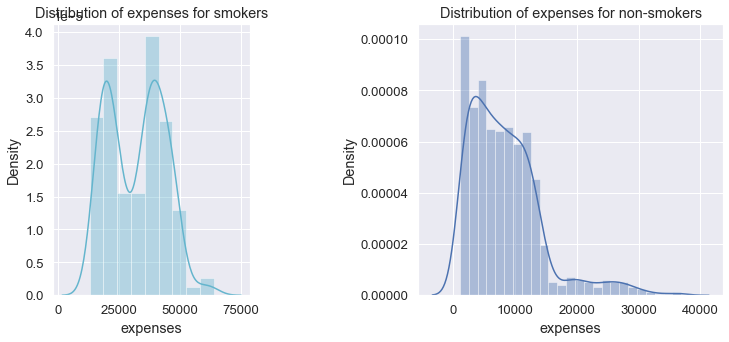

In [18]:
#First, let's look at the distribution of charges acros smokers and non-smokers.
f= pl.figure(figsize=(12,5))

#to use ax=axs[0] and ax=ax[1] for the second plot
#f, axs = pl.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[10, 10]))

sns.set(font_scale=1.2)

ax=f.add_subplot(131)
sns.distplot(data[(data.smoker == 1)]["expenses"],color='c',ax=ax)
ax.set_title('Distribution of expenses for smokers')

ax=f.add_subplot(122)
sns.distplot(data[(data.smoker == 0)]['expenses'],color='b',ax=ax)
ax.set_title('Distribution of expenses for non-smokers')


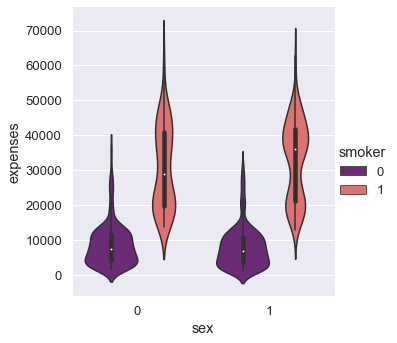

In [19]:
#women are coded with the symbol " 1 "and men - "0".
#You can use kind= violin, box, boxen
sns.set(font_scale=1.2)
sns.catplot(x="sex", y="expenses", hue="smoker",
            kind="violin", data=data, palette = 'magma')

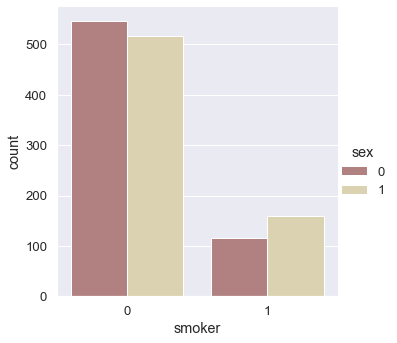

In [20]:
#Smoking patients spend more on treatment. 
#But there is a feeling that the number of non-smoking patients is greater. 
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="pink", data=data)

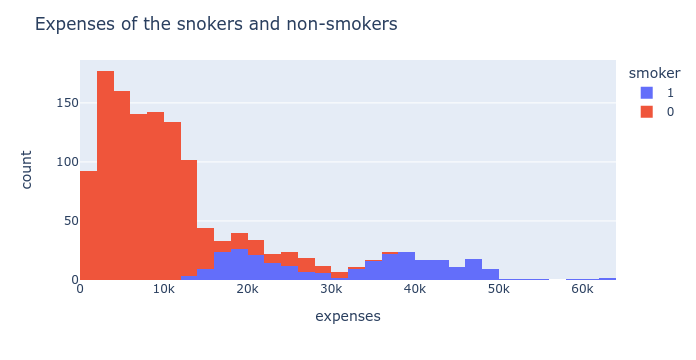

In [21]:
#Histogram of the plot
fig = px.histogram(data, x="expenses", color = "smoker")
fig.update_layout(title_text= "Expenses of the snokers and non-smokers")
fig.show()

<AxesSubplot:title={'center':'Box plot for charges of women'}, xlabel='expenses', ylabel='smoker'>

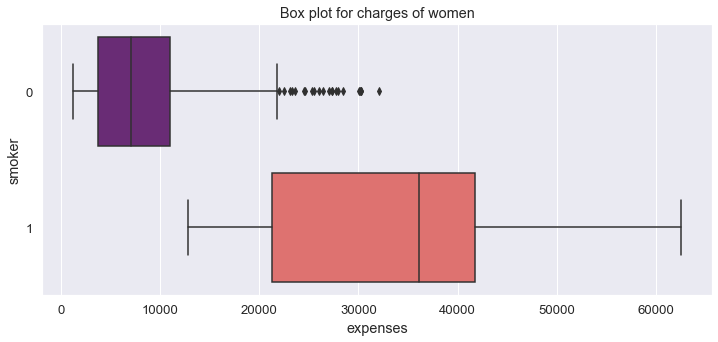

In [22]:
#REminder: women are coded with the symbol " 1 "and men - "0".
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="expenses", data =  data[(data.sex == 1)] , orient="h", palette = 'magma')


<AxesSubplot:title={'center':'Box plot for charges of men'}, xlabel='expenses', ylabel='smoker'>

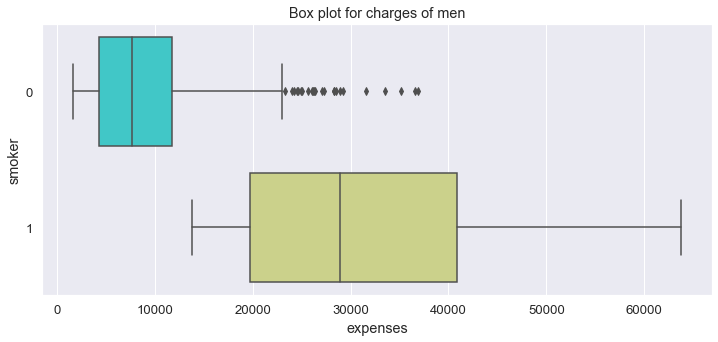

In [23]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="expenses", data =  data[(data.sex == 0)] , orient="h", palette = 'rainbow')

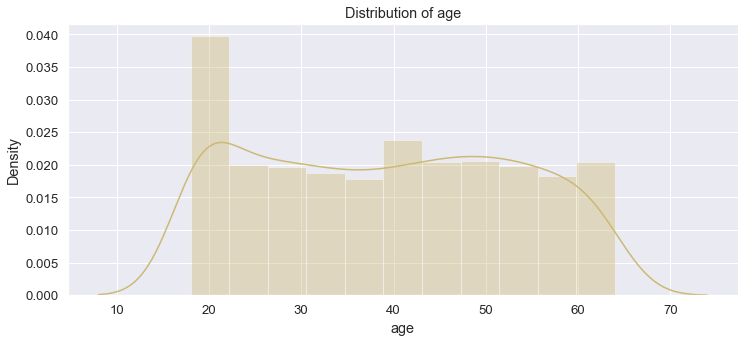

In [24]:
#Let consider the age of the patients
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.distplot(data["age"], color = 'y')

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

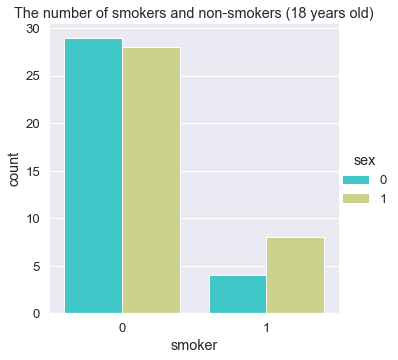

In [25]:
#Are there smokers among patients 18 years? Let check it out
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

<AxesSubplot:title={'center':'Box plot for charges 18 years old smokers'}, xlabel='expenses', ylabel='smoker'>

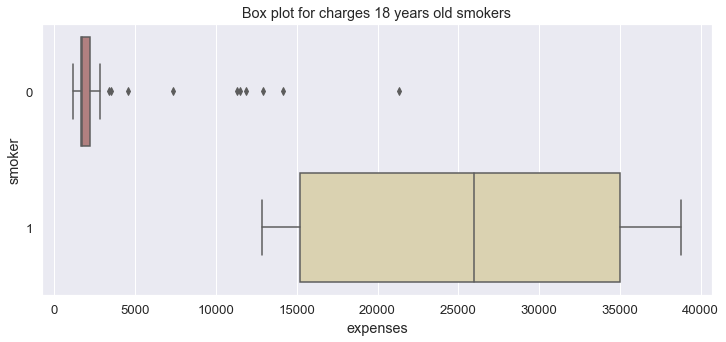

In [26]:
#Does smoking affect the cost of treatment at this age?
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="expenses", data = data[(data.age == 18)] , orient="h", palette = 'pink')

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

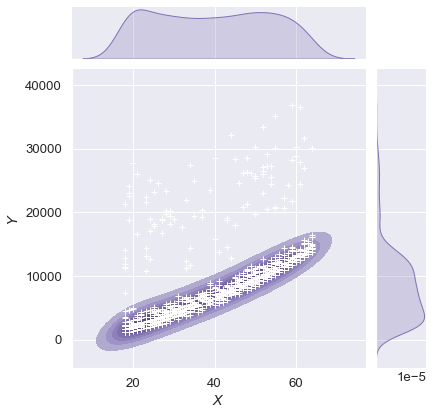

In [27]:
#Among non-smokers we are seeing some " tails." 
#which can be assumed to be due to serious diseases or accidents.
#Let look at how the cost of treatment depends on the age of smokers 
#and non-smokers patients.
#You can make use of kind="kde, hex, hist, reg, resid, scatter "
g = sns.jointplot(x="age", y="expenses", data = data[(data.smoker == 0)],kind="kde", color="m", fill=True)
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for non-smokers')

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

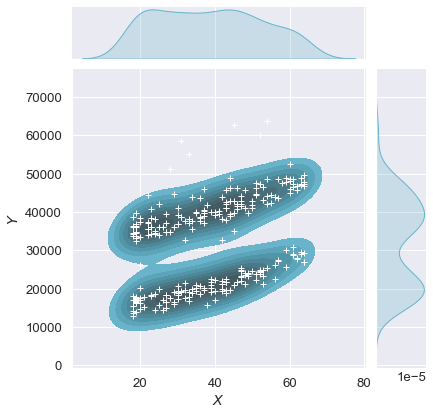

In [28]:
g = sns.jointplot(x="age", y="expenses", data = data[(data.smoker == 1)],kind="kde", color="c", fill=True)
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of charges and age for smokers')

Text(0.5, 1.0, 'Smokers and non-smokers')

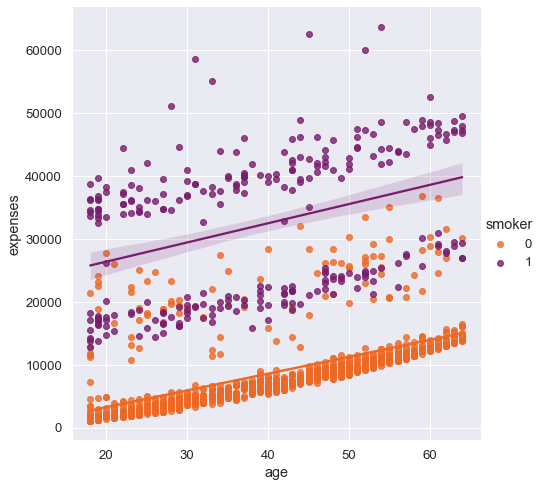

In [29]:
sns.lmplot(x="age", y="expenses", hue="smoker", data=data, palette = 'inferno_r', size = 7)
ax.set_title('Smokers and non-smokers')

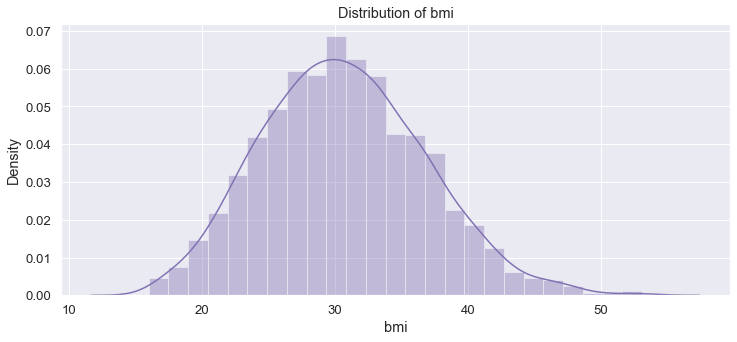

In [30]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.distplot(data["bmi"], color = 'm')

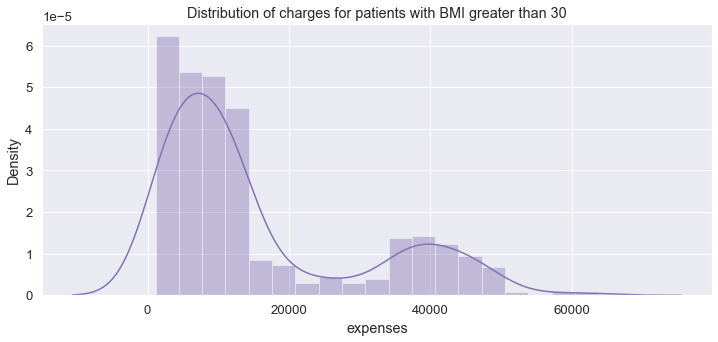

In [31]:
#The average BMI in patients is 30. 
#Now,look at the distribution of costs in patients with BMI greater 
#than 30 and less than 30.
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.distplot(data[(data.bmi >= 30)]['expenses'], color = 'm')

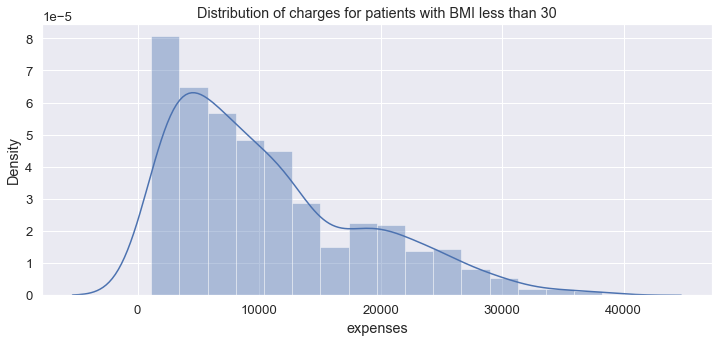

In [32]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.distplot(data[(data.bmi < 30)]['expenses'], color = 'b')

Text(0.5, 1.0, 'Distribution of bmi and charges')

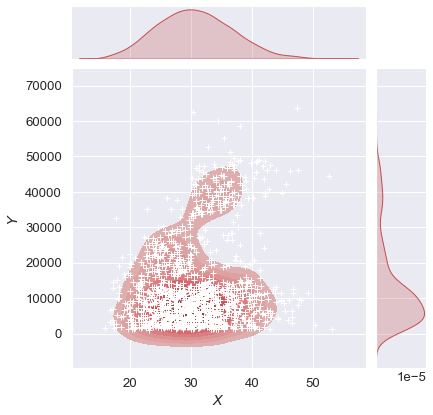

In [33]:
#Patients with BMI above 30 spend more on treatment!
g = sns.jointplot(x="bmi", y="expenses", data = data,kind="kde", color="r", fill=True)
g.plot_joint(pl.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$")
ax.set_title('Distribution of bmi and charges')

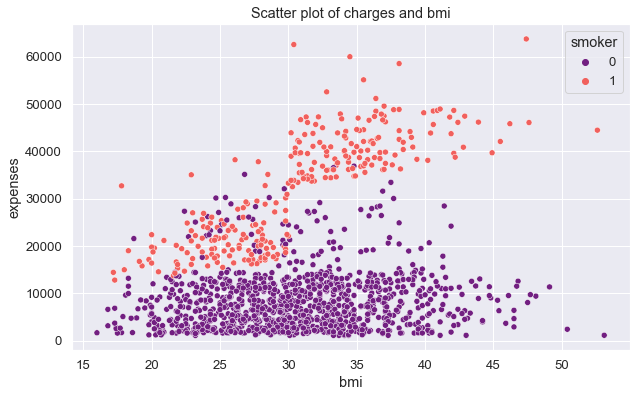

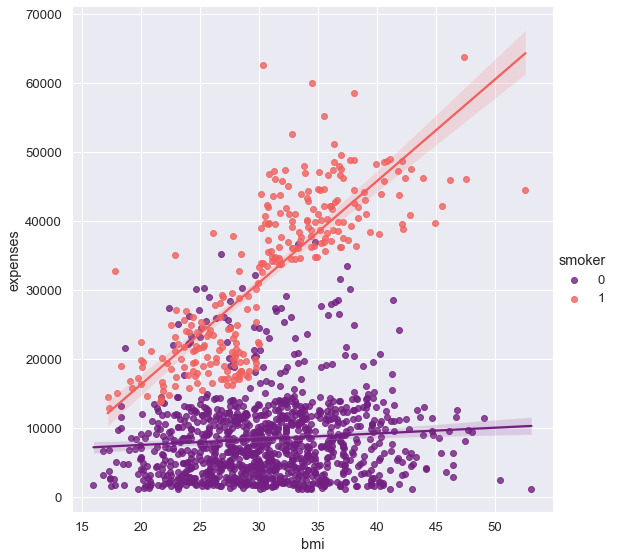

In [34]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='expenses',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="expenses", hue="smoker", data=data, palette = 'magma', size = 8)

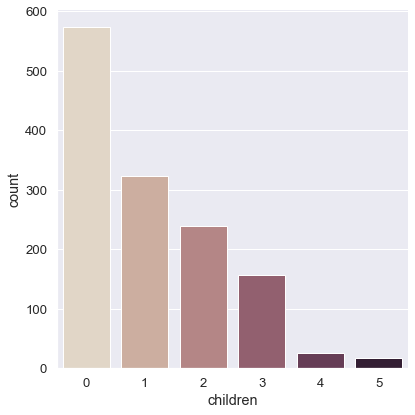

In [35]:
#Let's pay attention to children. First, let's see how many children our patients have.
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, size = 6)

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

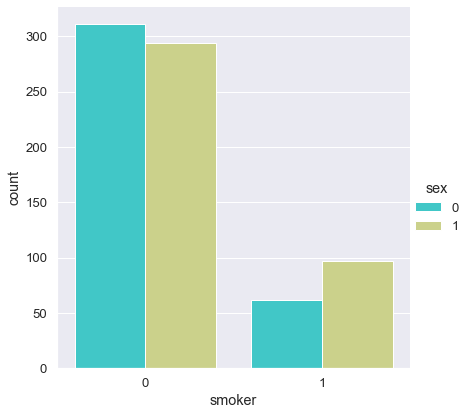

In [36]:
#Most patients do not have children. 
#Perfectly that some have 5 children! 
#Let examine if people who have children smoke.

sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)], size = 6)
ax.set_title('Smokers and non-smokers who have childrens')

In [37]:
#And now we are going to predict the cost of treatment. 
#Let's start with the usual linear regression.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [38]:
#NOTE: In scikit-learn, seeting the random_state to interger like 0 or 1 will make it to
#generate the same results when the code is rerun several times, 
#if set to None, the results will
#be different at each run
x = data.drop(['expenses','region'], axis = 1)
y = data.expenses
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)

#To print superscript on the terminal use "\u00b", to print subscript on the terminal use "\u208"
print('Train R\u00b2 =  %.3f' % (lr.score(x_train,y_train)))
print('Test R\u00b2 =  %.3f' % (lr.score(x_test,y_test)))

print(lr.coef_)
print(lr.intercept_)

Train R² =  0.733
Test R² =  0.795
[2.51741471e+02 1.14851482e+01 3.14093854e+02 4.38998271e+02
 2.36235168e+04]
-11570.413586446004


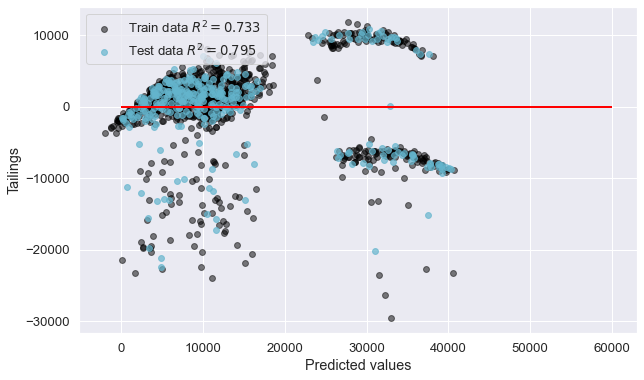

In [39]:
train1R2 = r'$R^2=  %.3f$' % (np.mean(lr.score(x_train,y_train)))

test1R2 = r'$R^2 = %.3f$' % (np.mean(lr.score(x_test,y_test)))

pl.figure(figsize=(10,6))

pl.scatter(y_train_pred,y_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = f'Train data {train1R2}')
pl.scatter(y_test_pred,y_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = f'Test data {test1R2}')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

In [40]:
#This is relatively good
#Now let's add polynomial signs. And look at the result.
X = data.drop(['expenses','region'], axis = 1)
Y = data.expenses


quad = PolynomialFeatures (degree = 2)
x_quad = quad.fit_transform(X)

X_train,X_test,Y_train,Y_test = train_test_split(x_quad,Y, random_state = 0)

plr = LinearRegression().fit(X_train,Y_train)

Y_train_pred = plr.predict(X_train)
Y_test_pred = plr.predict(X_test)

print('Test R\u00b2 =  %.3f' % (plr.score(X_test,Y_test)))
print('Train R\u00b2 =  %.3f' % (plr.score(X_train,Y_train)))
print(plr.coef_)
print(plr.intercept_)

Test R² =  0.885
Train R² =  0.828
[ 0.00000000e+00 -2.68977363e+01 -3.40448179e+02  5.65815694e+02
  8.40933470e+02 -9.50731093e+03  2.92945626e+00  1.17152329e+01
  1.52977484e+00  5.36521714e+00  7.09821541e+00 -3.40448179e+02
  9.04826288e+00 -2.82797752e+02 -6.30975167e+02 -9.97611376e+00
  8.26133269e+00  1.41576377e+03 -1.30285834e+02 -4.45720107e+02
 -9.50731093e+03]
-5988.062193028389


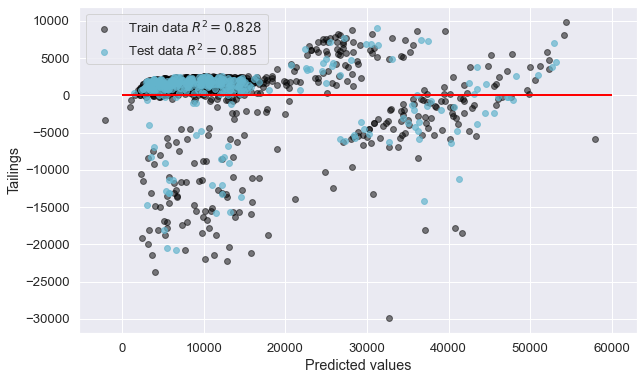

In [41]:
train2R2 = r'$R^2=  %.3f$' % (np.mean(plr.score(X_train,Y_train)))

test2R2 = r'$R^2 = %.3f$' % (np.mean(plr.score(X_test,Y_test)))

pl.figure(figsize=(10,6))

pl.scatter(Y_train_pred,Y_train_pred - Y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = f'Train data {train2R2}')
pl.scatter(Y_test_pred,Y_test_pred - Y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = f'Test data {test2R2}')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

In [42]:
#Already good. Our model predicts well the cost of treatment of patients.
#Let limit ourselves to creating two polynomial features because the data set is 
#so small
#And finally try RandomForestRegressor. 
x = data.drop(['expenses','region'], axis = 1)
y = data.expenses
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

forest = RandomForestRegressor(n_estimators = 100,
                              criterion = 'mse',
                              random_state = 1,
                              n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R\u00b2 train data: %.3f, R\u00b2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))


MSE train data: 3905365.106, MSE test data: 20970807.386
R² train data: 0.973, R² test data: 0.867


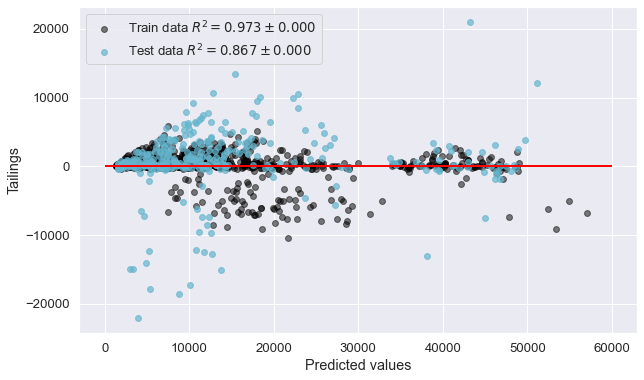

In [43]:
train3R2 = r'$R^2=  %.3f \pm %.3f$' % (np.mean(r2_score(y_train,forest_train_pred)), np.std(r2_score(y_train,forest_train_pred)))

test3R2 = r'$R^2 = %.3f \pm %.3f$' % (np.mean(r2_score(y_test,forest_test_pred)), np.std(r2_score(y_test,forest_test_pred)))

pl.figure(figsize=(10,6))

pl.scatter(forest_train_pred,forest_train_pred - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = f'Train data {train3R2}')
pl.scatter(forest_test_pred,forest_test_pred - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = f'Test data {test3R2}')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()

In [44]:
#Good result. But we see a noticeable retraining of the algorithm on the training data.
#Let apply PCA analysis on the data
from sklearn.decomposition import PCA

x = data.drop(['expenses','region'], axis = 1)
y = data.expenses
x_train,x_test,y_train,y_test = train_test_split(x,y, random_state = 0)

trainpca = PCA(whiten=True)
#pca = PCA(n_components=36,whiten=True)
trainpca = trainpca.fit(x_train)
#variance = pd.DataFrame(trainpca.explained_variance_ratio_)
#np.cumsum(trainpca.explained_variance_ratio_)
x_trainPCA = trainpca.transform(x_train)

testpca = PCA(whiten=True)
testpca = testpca.fit(x_test)
x_testPCA = testpca.transform(x_test)

lrpca = LinearRegression().fit(x_trainPCA,y_train)

y_train_predPCA = lrpca.predict(x_trainPCA)
print(f'Train R\u00b2 =  %.3f' % (lrpca.score(x_trainPCA,y_train)))

y_test_predPCA = lrpca.predict(x_testPCA)
print(f'Test R\u00b2 =  %.3f' %(lrpca.score(x_testPCA,y_test)))

print(lrpca.coef_)
print(lrpca.intercept_)

Train R² =  0.733
Test R² =  0.671
[3337.97460272 1786.15968334  819.76797083 1782.96452578 9307.3287075 ]
13215.863399800597


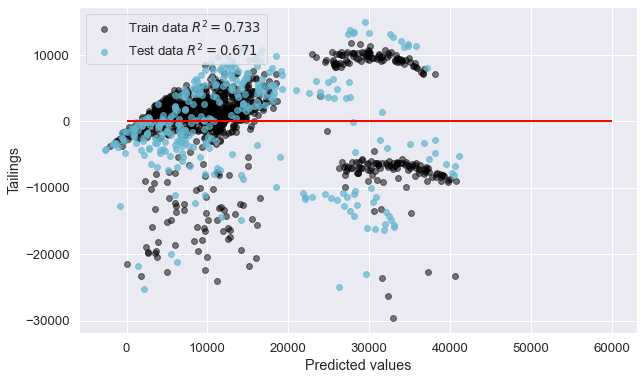

In [45]:
#The PCA did not provide better correlation, the polynomia is better
train4R2 = r'$R^2=  %.3f$' % (np.mean(lrpca.score(x_trainPCA,y_train)))

test4R2 = r'$R^2 = %.3f$' % (np.mean(lrpca.score(x_testPCA,y_test)))

pl.figure(figsize=(10,6))

pl.scatter(y_train_predPCA,y_train_predPCA - y_train,
          c = 'black', marker = 'o', s = 35, alpha = 0.5,
          label = f'Train data {train4R2}')
pl.scatter(y_test_predPCA,y_test_predPCA - y_test,
          c = 'c', marker = 'o', s = 35, alpha = 0.7,
          label = f'Test data {test4R2}')
pl.xlabel('Predicted values')
pl.ylabel('Tailings')
pl.legend(loc = 'upper left')
pl.hlines(y = 0, xmin = 0, xmax = 60000, lw = 2, color = 'red')
pl.show()